In [101]:
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
from flickplay.mongo import get_mongo_db_obj
import pandas as pd
import warnings
import numpy as np
import sys

warnings.filterwarnings("ignore")

con, conp = get_alchemy_con(), get_pymysql_con()
db = get_mongo_db_obj()

In [102]:

conp = get_pymysql_con()

query = """
SELECT event, $user_id, date, time
FROM fpa.events
WHERE 
    event like 'session%' AND
--    event='session__start' OR 
--    event='session__end' AND
    date>='2022-11-1' AND
    date<'2022-12-1' AND
    $user_id IS NOT NULL
ORDER BY time asc
"""

dd = pd.read_sql(query, conp).dropna()


In [103]:
uids = list(set(dd['$user_id']))
pd.set_option('display.max_rows', None)
nuids = len(uids)

avg_session_length_by_user, n_sessions_by_user = dict(), dict()

for idx, uid in enumerate(uids):
    sys.stdout.write(f'\r{idx} of {nuids}.')
    lengths = []
    user_dd = dd[dd['$user_id'] == uid].copy()
    
    n_sessions = len(user_dd[user_dd.event=='session__end'])
    
    for idx, row in user_dd.iterrows():
        if row.event == 'session__end':
            try:
                if dd.iloc[idx].at['time'] > dd.iloc[idx-1].at['time'] and dd.iloc[idx-1].at['event'] == 'session__start':
                    
                    session_len = dd.iloc[idx].at['time']- dd.iloc[idx-1].at['time']
                    if not(np.isnan(session_len)):
                        lengths.append(session_len)
            except:
                pass
        
    avg_session_len = np.average(lengths)
    avg_session_length_by_user[uid] = avg_session_len
    n_sessions_by_user[uid] = n_sessions

    
dout = pd.DataFrame()

user_ids, avg_session_lens, n_sessions = [],[],[]

for idx, uid in enumerate(uids):
    user_ids.append(uid)
    avg_session_lens.append(avg_session_length_by_user[uid])
    n_sessions.append(n_sessions_by_user[uid])
    
dout['$user_id'] = user_ids
dout['n_sessions']= n_sessions
dout['avg_session_len'] = [ round(s,1) for s in avg_session_lens ]

dout = dout[dout.n_sessions>=1].sort_values(by='n_sessions', ascending=False).reset_index().drop(columns='index').dropna()

dout.to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/2022-12-session-len.csv',index=False)
dout

# print()
# print('user_id','n_sessions','avg_session_len')

# for idx, row in dout.iterrows():

#     print(row['$user_id'], row.n_sessions, row.avg_session_len)

1085 of 1086.

,$user_id,n_sessions,avg_session_len
0,5df1201474236794fbe087bb,502,50.9
1,62bf3b0b1cc78f2ab79f7479,461,64.7
2,62a1e07c309538d8a0a774ce,428,81.2
3,63316470d7d49d45584ccc5e,377,48.6
4,62c7adc4b8deb3d981f8b8bc,305,108.8
5,609d510c4244340b2a77c83a,281,50.3
6,637563bedf033a9580c865d7,257,45.8
7,6293081e82c92e0a0ca0fd92,235,140.0
8,5f3446b8b16e487e29d95d20,217,72.7
9,5ee9463955c2ec52d977680a,204,76.2


In [104]:

for session_cut in (2,3,5,10,20,30,40,50,100):
    print()
    print('N sessions >= {}'.format(session_cut))
    print(dout[dout.n_sessions>=session_cut].describe())


N sessions >= 2
       n_sessions  avg_session_len
count  438.000000       438.000000
mean    19.171233        52.048402
std     55.229253        83.987412
min      2.000000         1.000000
25%      2.250000        15.575000
50%      4.000000        34.400000
75%     10.000000        63.800000
max    502.000000      1331.500000

N sessions >= 3
       n_sessions  avg_session_len
count  328.000000       328.000000
mean    24.929878        46.278049
std     62.800529        41.739929
min      3.000000         1.000000
25%      4.000000        17.375000
50%      6.000000        35.100000
75%     13.000000        63.400000
max    502.000000       320.500000

N sessions >= 5
       n_sessions  avg_session_len
count  210.000000       210.000000
mean    37.000000        47.991429
std     75.918176        37.210222
min      5.000000         3.000000
25%      6.000000        22.975000
50%     10.000000        40.100000
75%     20.750000        65.000000
max    502.000000       320.500000

N s

In [105]:
CUT_MIN=3
cutoff = CUT_MIN*60 # < 5min, 5+ min

dout[dout.avg_session_len>=cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/long_sessions.csv', index=False)

dout[dout.avg_session_len<cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/short_sessions.csv', index=False)

In [106]:
len(dout[dout.avg_session_len<cutoff])

576

In [107]:
db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


In [111]:
ddd = dout
ddd = ddd[ddd['$user_id'].isin(wallet_users) ]
cutoff = CUT_MIN*60 # < 5min, 5+ min

ddd[ddd.avg_session_len>=cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/Web3-Cohort-long_sessions.csv', index=False)

ddd[ddd.avg_session_len<cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/Web3-Cohort-short_sessions.csv', index=False)

In [112]:
print(len(ddd[ddd.avg_session_len<cutoff]))

149


In [113]:
len(ddd)

152

In [114]:
print('Web3 Cohort')
print(ddd[ddd['$user_id'].isin(wallet_users) ].describe())
print()
print('Non-Web3 Cohort')
print(ddd[~ddd['$user_id'].isin(wallet_users) ].describe())
print()


Web3 Cohort
       n_sessions  avg_session_len
count  152.000000       152.000000
mean    39.552632        58.688816
std     86.100187       113.410505
min      1.000000         1.000000
25%      3.000000        18.600000
50%      6.000000        39.950000
75%     19.000000        67.475000
max    502.000000      1331.500000

Non-Web3 Cohort
       n_sessions  avg_session_len
count         0.0              0.0
mean          NaN              NaN
std           NaN              NaN
min           NaN              NaN
25%           NaN              NaN
50%           NaN              NaN
75%           NaN              NaN
max           NaN              NaN



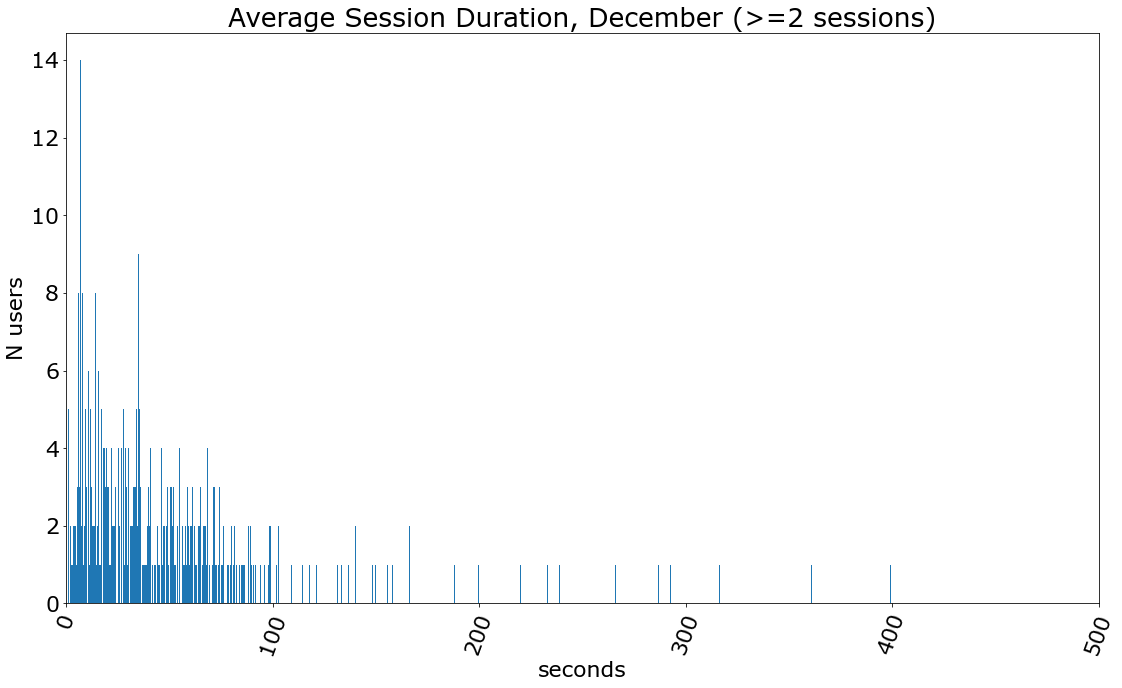

In [115]:

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.hist(dout[dout.n_sessions>=2]['avg_session_len'],bins=3000)
plt.xlim(0, 500)
plt.xticks(rotation=70)
plt.title('Average Session Duration, December (>=2 sessions)')
plt.xlabel('seconds')
plt.ylabel('N users')

plt.savefig('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/session_length.jpg')

plt.show()

In [116]:
len(dout[dout.n_sessions>=2])

438

In [117]:
len(ddd)

152

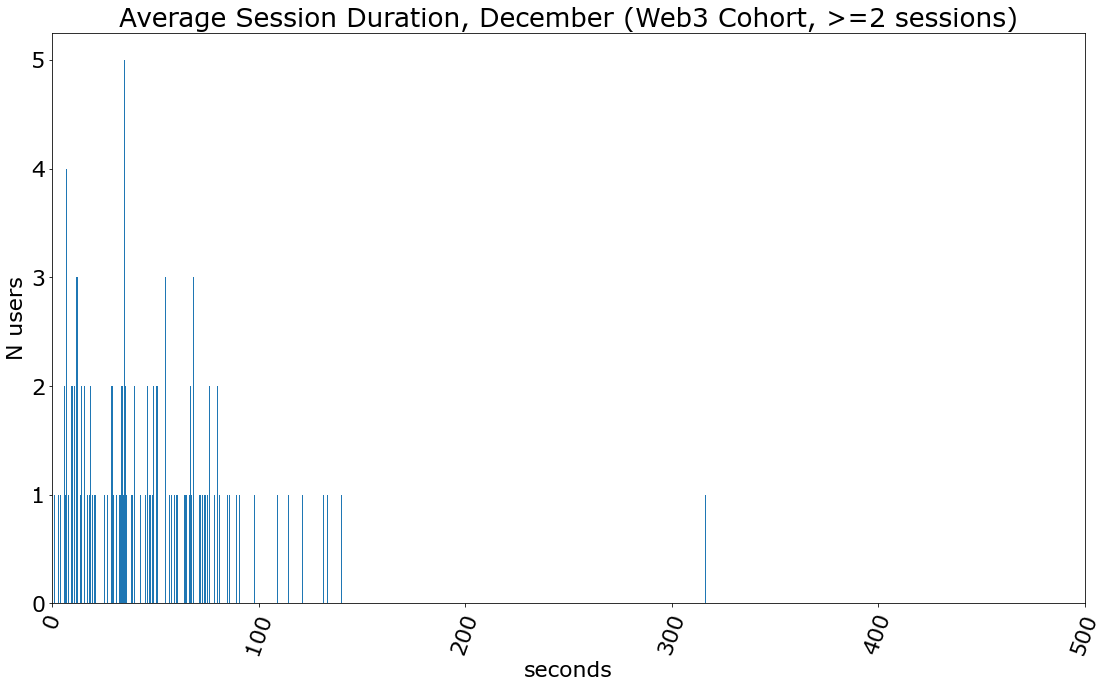

In [118]:
# ddd = dout[dout.n_sessions>=2]
# ddd[ddd['$user_id'].isin(wallet_users) ]

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.hist(ddd[ddd.n_sessions>=2]['avg_session_len'],bins=3000)
plt.xlim(0, 500)
plt.xticks(rotation=70)
plt.title('Average Session Duration, December (Web3 Cohort, >=2 sessions)')
plt.xlabel('seconds')
plt.ylabel('N users')

plt.savefig('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/Web3-Cohort-session_length.jpg')

plt.show()

In [119]:
# Total MAU:
# # 5>min Users:
# Average session:
# # <5min Users:
# Average session:

In [120]:


cutoff = CUT_MIN*60 # 5 min 

dx = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions')
long = dx[dx.avg_session_len>=cutoff]
short = dx[dx.avg_session_len<cutoff]

print(f'\n>5min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

lsum = 0
lsess_sum = 0
for idx, row in long.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')

print(f'<5min Users:','\n', f'\t{len(short)} users,{round(len(short)/len(dx)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in short.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')


Total MAU: 612 Users, 8571 sessions

>5min Users: 
 	36 users, 5.9% of total MAU.
	Average session duration: 2585.4 seconds
	Number of sessions:59 sessions, 0.7% of total sessions
<5min Users: 
 	576 users,94.1% of total MAU.
	Average session duration: 58.6 seconds
	Number of sessions: 8512 sessions, 99.3% of total sessions


In [121]:
# Total MAU:
# # Web3 Users:
# Average session:
# # Other Users:
# Average session:

db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


dw = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dw.screen_time_hr),1)} hours')
w3 = dw[dw['$user_id'].isin(wallet_users)]
nw3 = dw[~dw['$user_id'].isin(wallet_users)]
total_screen_time = sum(dw.screen_time_hr)

print(f'\nWeb3 Cohort:','\n', f'\t{len(w3)} users, {round(len(w3)/len(dw)*100,1)}% of total MAU')
print(f'{round(sum(w3.screen_time_hr),1)} hours, {round(sum(dw.screen_time_hr)/sum(dw.screen_time_hr)*100,1)}% of total {round(sum(dw.screen_time_hr),1)} hours')

lsum = 0
lsess_sum = 0
for idx, row in w3.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(w3.n_sessions),1), 'seconds')
# print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
long,short=w3,nw3
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())
print()
print(f'\nNon-Web3 Cohort:','\n', f'\t{len(nw3)} users,{round(len(nw3)/len(dw)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in nw3.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())



# cutoff = 5*60 # 5 min 

# dx = d.copy()#dout[dout.n_sessions>=0].copy()
# total_n_sess = sum(dout.n_sessions)
# print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)} hours')
# long = dx[dx.avg_session_len>=cutoff]
# short = dx[dx.avg_session_len<cutoff]
# total_screen_time = sum(dx.screen_time_hr)

# print(f'\n>5min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

# lsum = 0
# lsess_sum = 0
# for idx, row in long.iterrows():
#     lsum+=row.n_sessions*row.avg_session_len 
#     lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
# print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
# print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
# print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
# print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
# print()
# print(long.describe())

# print('='*80)
# print()
# print(f'<5min Users:','\n', f'\t{len(short)} users, {round(len(short)/len(dx)*100,1)}% of total MAU.')
# ssum = 0
# ssess_sum=0
# sess_total_time=0

# for idx, row in short.iterrows():
#     ssum+=row.n_sessions*row.avg_session_len 
#     ssess_sum+=row.n_sessions
# print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
# print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
# print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
# print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
# print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
# print()
# print(short.describe())

AttributeError: 'DataFrame' object has no attribute 'screen_time_hr'

In [ ]:


cutoff = 5*60 # 5 min 

dx = d.copy()#dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)} hours')
long = dx[dx.avg_session_len>=cutoff]
short = dx[dx.avg_session_len<cutoff]
total_screen_time = sum(dx.screen_time_hr)

print(f'\n>5min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

lsum = 0
lsess_sum = 0
for idx, row in long.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())

print('='*80)
print()
print(f'<5min Users:','\n', f'\t{len(short)} users, {round(len(short)/len(dx)*100,1)}% of total MAU.')
ssum = 0
ssess_sum=0
sess_total_time=0

for idx, row in short.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())

# Total MAU:
# # Web3 Users:
# Average session:
# # Other Users:
# Average session:

db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


dw = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dw.screen_time_hr),1)} hours')
w3 = dw[dw['$user_id'].isin(wallet_users)]
nw3 = dw[~dw['$user_id'].isin(wallet_users)]
total_screen_time = sum(dw.screen_time_hr)

print(f'\nWeb3 Cohort:','\n', f'\t{len(w3)} users, {round(len(w3)/len(dw)*100,1)}% of total MAU')
print(f'{round(sum(w3.screen_time_hr),1)} hours, {round(sum(dw.screen_time_hr)/sum(dw.screen_time_hr)*100,1)}% of total {round(sum(dw.screen_time_hr),1)} hours')

lsum = 0
lsess_sum = 0
for idx, row in w3.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(w3.n_sessions),1), 'seconds')
# print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
long,short=w3,nw3
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())
print()
print(f'\nNon-Web3 Cohort:','\n', f'\t{len(nw3)} users,{round(len(nw3)/len(dw)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in nw3.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())



# cutoff = 5*60 # 5 min 

# dx = d.copy()#dout[dout.n_sessions>=0].copy()
# total_n_sess = sum(dout.n_sessions)
# print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)}

In [ ]:
d = dout[dout.avg_session_len <= 1000]
d = d[d.n_sessions>10]

xs = d['n_sessions'].values
ys = d['avg_session_len'].values

X = [ _ for _ in xs ]
logX = [  np.log(_) for _ in X ]
y = [ _ for _ in ys ]
logy = [ np.log(_) for _ in y ]

plt.scatter(X, y)

In [122]:
d[d['$user_id']=='637563bedf033a9580c865d7']

,$user_id,n_sessions,avg_session_len,screen_time_hr
6,637563bedf033a9580c865d7,257,45.8,3.3


In [123]:
# % of users who have N or fewer sessions

n_pops = dict() # population of users who have (key) number of sessions in november
n_session_max = max(dout.n_sessions)
n_total_sesh = sum(dout.n_sessions)

print(n_session_max)
print(n_total_sesh)

for n in range(1,100):
    N_users = len(dout[dout.n_sessions==n])
    n_pops[n] = N_users
    user_pct = round(N_users/len(dout)*100,1)
    sesh_pct = round(N_users*n/n_total_sesh*100,1)
    print(f'{N_users} users have {n} sessions, \n\t{user_pct}% of the total {len(dout)} MAU \t\t{sesh_pct}% of the {total_n_sess} sessions.')

502
8571
174 users have 1 sessions, 
	28.4% of the total 612 MAU 		2.0% of the 8571 sessions.
110 users have 2 sessions, 
	18.0% of the total 612 MAU 		2.6% of the 8571 sessions.
65 users have 3 sessions, 
	10.6% of the total 612 MAU 		2.3% of the 8571 sessions.
53 users have 4 sessions, 
	8.7% of the total 612 MAU 		2.5% of the 8571 sessions.
33 users have 5 sessions, 
	5.4% of the total 612 MAU 		1.9% of the 8571 sessions.
22 users have 6 sessions, 
	3.6% of the total 612 MAU 		1.5% of the 8571 sessions.
18 users have 7 sessions, 
	2.9% of the total 612 MAU 		1.5% of the 8571 sessions.
14 users have 8 sessions, 
	2.3% of the total 612 MAU 		1.3% of the 8571 sessions.
8 users have 9 sessions, 
	1.3% of the total 612 MAU 		0.8% of the 8571 sessions.
12 users have 10 sessions, 
	2.0% of the total 612 MAU 		1.4% of the 8571 sessions.
8 users have 11 sessions, 
	1.3% of the total 612 MAU 		1.0% of the 8571 sessions.
7 users have 12 sessions, 
	1.1% of the total 612 MAU 		1.0% of the 8571 

In [124]:
total_time = []


for idx, row in dout.iterrows():
    total_time.append(row.n_sessions*row.avg_session_len)
    
dout['screen_time_hr'] = [ round(x/60**2,1) for x in total_time ]
# dout[dout['$user_id'] == 

In [125]:
d = dout.copy()


CUT_MIN=3
cutoff = CUT_MIN*60 # 3 min 

dx = d.copy()#dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)} hours')
long = dx[dx.avg_session_len>=cutoff]
short = dx[dx.avg_session_len<cutoff]
total_screen_time = sum(dx.screen_time_hr)

print(f'\n>{CUT_MIN}min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

lsum = 0
lsess_sum = 0
for idx, row in long.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())

print('='*80)
print()
print(f'<{CUT_MIN}min Users:','\n', f'\t{len(short)} users, {round(len(short)/len(dx)*100,1)}% of total MAU.')
ssum = 0
ssess_sum=0
sess_total_time=0

for idx, row in short.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())

# Total MAU:
# # Web3 Users:
# Average session:
# # Other Users:
# Average session:

db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


dw = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dw.screen_time_hr),1)} hours')
w3 = dw[dw['$user_id'].isin(wallet_users)]
nw3 = dw[~dw['$user_id'].isin(wallet_users)]
total_screen_time = sum(dw.screen_time_hr)

print(f'\nWeb3 Cohort:','\n', f'\t{len(w3)} users, {round(len(w3)/len(dw)*100,1)}% of total MAU')
print(f'{round(sum(w3.screen_time_hr),1)} hours, {round(sum(dw.screen_time_hr)/sum(dw.screen_time_hr)*100,1)}% of total {round(sum(dw.screen_time_hr),1)} hours')

lsum = 0
lsess_sum = 0
for idx, row in w3.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(w3.n_sessions),1), 'seconds')
# print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
long,short=w3,nw3
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())
print()
print(f'\nNon-Web3 Cohort:','\n', f'\t{len(nw3)} users,{round(len(nw3)/len(dw)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in nw3.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())



# cutoff = 5*60 # 5 min 

# dx = d.copy()#dout[dout.n_sessions>=0].copy()
# total_n_sess = sum(dout.n_sessions)
# print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)}

Total MAU: 612 Users, 8571 sessions, 175.7 hours

>3min Users: 
 	36 users, 5.9% of total MAU.
	Average session duration: 2585.4 seconds
	Average number of sessions: 1.6 sessions
	Average screen time: 1.2 hours
	Total Number of sessions: 59 sessions, 0.7% of total sessions
	Total screen time: 42.2 hours 24.0% of the total 175.7 hours.

       n_sessions  avg_session_len  screen_time_hr
count   36.000000        36.000000       36.000000
mean     1.638889      4027.325000        1.172222
std      1.018480     20984.713356        5.818817
min      1.000000       188.000000        0.100000
25%      1.000000       229.750000        0.100000
50%      1.000000       344.000000        0.150000
75%      2.000000       520.250000        0.200000
max      5.000000    126391.000000       35.100000

<3min Users: 
 	576 users, 94.1% of total MAU.
	Average session duration: 58.6 seconds
	Average number of sessions: 14.8 sessions
	Average screen time: 0.2 hours
	Number of sessions: 8512 sessions, 99.3

In [126]:
dout.sort_values(by='screen_time_hr', ascending=False)

,$user_id,n_sessions,avg_session_len,screen_time_hr
678,63885d3ae9fb8b6f4265eece,1,126391.0,35.1
2,62a1e07c309538d8a0a774ce,428,81.2,9.7
4,62c7adc4b8deb3d981f8b8bc,305,108.8,9.2
7,6293081e82c92e0a0ca0fd92,235,140.0,9.1
1,62bf3b0b1cc78f2ab79f7479,461,64.7,8.3
0,5df1201474236794fbe087bb,502,50.9,7.1
3,63316470d7d49d45584ccc5e,377,48.6,5.1
8,5f3446b8b16e487e29d95d20,217,72.7,4.4
9,5ee9463955c2ec52d977680a,204,76.2,4.3
5,609d510c4244340b2a77c83a,281,50.3,3.9


In [127]:
dout.screen_time_hr.mean()

0.28709150326797267